# Predict Diseases: Diabetes

____

## Table of Contents
- [Importing libraries](#Importing-libraries)
- [Load data](#Load-data)
- [Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)
- [Data Exploration & Visualization](#Data-Exploration-&-Visualization)
- [Machine Learning for Predict Diabetes](#Machine-Learning-for-Predict-Diabetes)

____

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

____

## Load the data

In [2]:
df = pd.read_csv('../data/pima-data.csv')

## Checking  dimensions 

In [3]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df.shape

(768, 10)

____

## Data Cleaning and Preparation

### Drop nulls values

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(768, 10)

____

## Data Exploration & Visualization

### A Summary of the data

In [7]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


### Histograms

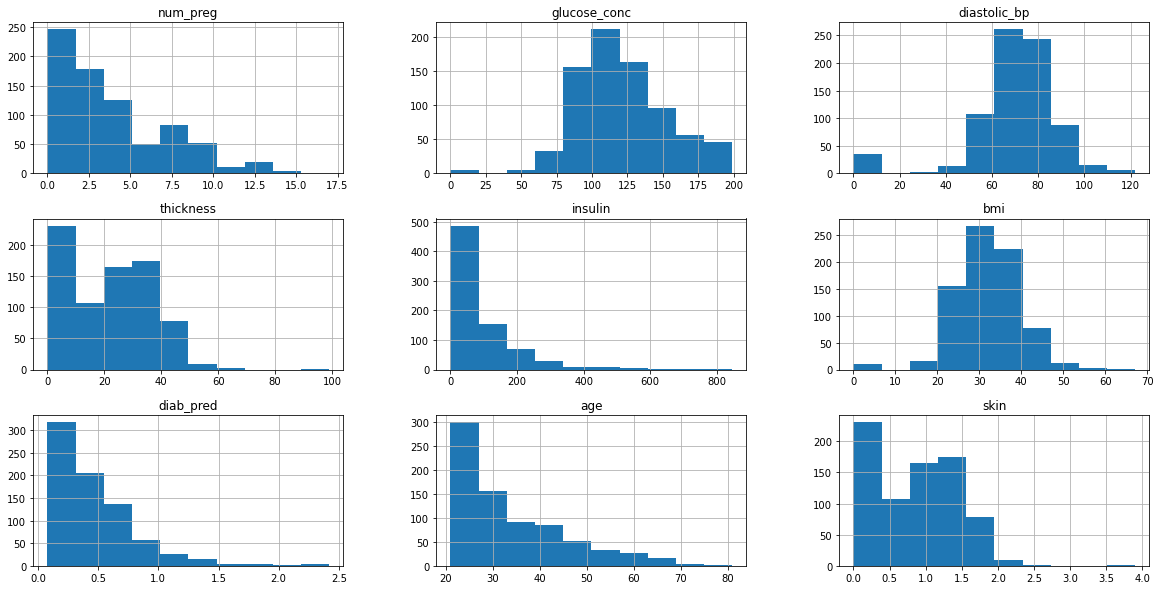

In [8]:
df.hist(figsize=(20,10))
plt.show()

### How many samples have diabetes?

In [9]:
df['diabetes'].sum()

268

#### Distribution of positive cases

In [10]:
diag_count = df.diabetes.value_counts()
diag_count

False    500
True     268
Name: diabetes, dtype: int64

#### Proportion

In [11]:
print('Class 0:', diag_count[0])
print('Class 1:', diag_count[1])
print('Proportion:', round(diag_count[0]/diag_count[1], 2), ': 1')

Class 0: 500
Class 1: 268
Proportion: 1.87 : 1


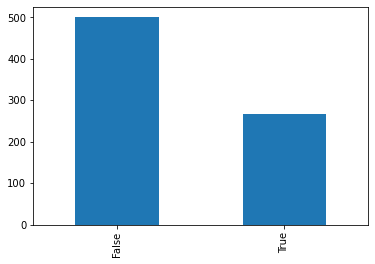

In [12]:
diag_count.plot(kind='bar')
plt.show()

____

## Machine Learning for Predict Diabetes

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Define Inputs & outputs

In [14]:
y = df.diabetes
X = df.drop('diabetes', axis=1)

For added clarity, one may choose to specify axis='index' (instead of axis=0) or axis='columns' (instead of axis=1).

### Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 27)

### Logistic Regression()

In [16]:
logistic_model = LogisticRegression(solver='liblinear')

In [17]:
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
y_pred = logistic_model.predict(X_test)

### Scores

In [19]:
pd.crosstab(y_pred, y_test)

diabetes,False,True
row_0,,
False,111,31
True,19,31


In [20]:
logistic_model.score(X_test, y_test)

0.7395833333333334

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.7395833333333334

In [22]:
metrics.precision_score(y_test, y_pred)

0.62

In [23]:
metrics.recall_score(y_test, y_pred)

0.5

## Try resample to balance the ratio of diabetes samples

In [24]:
X = pd.concat([X_train, y_train], axis=1)
X = X.reset_index(drop=True)

In [25]:
non_diabetic = df[df.diabetes==0]
diabetic = df[df.diabetes==1]  

### Oversample method

In [26]:
from sklearn.utils import resample

In [27]:
over_sample = resample(diabetic, replace = True, n_samples = len(non_diabetic), random_state = 27)

In [28]:
over_sample = pd.concat([non_diabetic, over_sample])
over_sample = over_sample.reset_index(drop=True) 

In [29]:
over_sample.sample(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
13,3,88,58,11,54,24.8,0.267,22,0.4334,False
53,2,100,68,25,71,38.5,0.324,26,0.9850,False
126,1,138,82,0,0,40.1,0.236,28,0.0000,False
409,4,90,88,47,54,37.7,0.362,29,1.8518,False
688,4,183,0,0,0,28.4,0.212,36,0.0000,True


### Look for the new distribution

In [30]:
diag_count = over_sample.diabetes.value_counts()
print('Class 0:', diag_count[0])
print('Class 1:', diag_count[1])
print('Proportion:', round(diag_count[0]/diag_count[1], 2), ': 1')

Class 0: 500
Class 1: 500
Proportion: 1.0 : 1


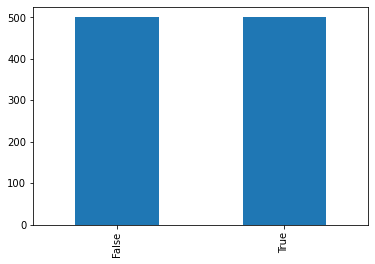

In [31]:
diag_count.plot(kind='bar')
plt.show()

### Remodel

In [32]:
y_train = over_sample.diabetes
X_train = over_sample.drop('diabetes', axis=1)

### Logistic Regression()

In [33]:
logistic_model = LogisticRegression(solver="liblinear")

In [34]:
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [35]:
y_pred = logistic_model.predict(X_test)

### Score

In [36]:
metrics.accuracy_score(y_test, y_pred)

0.75

In [37]:
metrics.precision_score(y_test, y_pred)

0.5921052631578947

In [38]:
metrics.recall_score(y_test, y_pred)

0.7258064516129032